In [1]:
import biolqm
import cabean
from colomoto_jupyter import tabulate

# Myeolid reprogramming with CABEAN

Import the myeloid network (Krumsiek et al. doi: 10.1371/journal.pone.0022649)

In [2]:
model = biolqm.load("MyeloidRules.txt", "booleannet")

Use the decompositon-based attractor detection method to identify all the exact attractors of the network.

In [3]:
%time attractors = cabean.attractors(model)
tabulate(attractors)

CPU times: user 5.7 ms, sys: 9.01 ms, total: 14.7 ms
Wall time: 52.2 ms


,CEBPA,EKLF,EgrNab,FOG1,Fli1,GATA1,GATA2,Gfi1,PU1,SCL,cJun
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,1,0,1
3,0,1,0,1,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,1,1,0,0
5,1,0,1,0,0,0,0,0,1,0,1


Define the properties of the source and target attractors. Note that source or target may correspond to serveral attractors.

In [4]:
source = {"EgrNab": 0, "CEBPA": 1}
target = {"EgrNab": 1, "CEBPA": 1}

Compute the minimal one-step instantaneous control (OI) from the source to the target.

In [5]:
c1i = cabean.OneStep_Instantaneous(model)
s1i = c1i.attractor_to_attractor(source, target)
s1i

[FromSteadyState('a4', InstantaneousPerturbation(EgrNab=1, Gfi1=0, cJun=1))]

In [6]:
s1i.as_table()

,EgrNab,Gfi1,cJun
0,1,0,1


Compute the attractor-based sequential instantaneous control (ASI) from the source to the target.

In [7]:
ci = cabean.AttractorSequential_Instantaneous(model)
si = ci.attractor_to_attractor(source, target)
si

[FromSteadyState('a4', InstantaneousPerturbation(EgrNab=1, Gfi1=0, cJun=1)),
 
 FromSteadyState('a4', InstantaneousPerturbation(CEBPA=0), 
     FromSteadyState('a2', InstantaneousPerturbation(CEBPA=1)))]

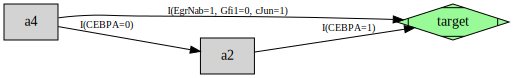

In [8]:
si.as_graph()

In [9]:
si.as_table()

,CEBPA,EgrNab,Gfi1,cJun
0,,1,0,1
1,*,,,


Compute the minimal one-step temporary control (OT) from the source to the target.

In [10]:
c1t = cabean.OneStep_Temporary(model)
s1t = c1t.attractor_to_attractor(source, target)
s1t

[FromSteadyState('a4', TemporaryPerturbation(Gfi1=0)),
 FromSteadyState('a4', TemporaryPerturbation(EgrNab=1))]

In [11]:
s1t.as_table()

,EgrNab,Gfi1
0,,0
1,1,


Compute the attractor-based sequential temporary control (AST) from the source to the target.

In [12]:
ct = cabean.AttractorSequential_Temporary(model)
st = ct.attractor_to_attractor(source, target)
st

[FromSteadyState('a4', TemporaryPerturbation(Gfi1=0)),
 FromSteadyState('a4', TemporaryPerturbation(EgrNab=1))]

In [13]:
st.as_table()

,EgrNab,Gfi1
0,,0
1,1,


Compute the minimal one-step permanent control (OP) from the source to the target.

In [14]:
c1p = cabean.OneStep_Permanent(model)
s1p = c1p.attractor_to_attractor(source, target)
s1p

[FromSteadyState('a4', PermanentPerturbation(Gfi1=0)),
 FromSteadyState('a4', PermanentPerturbation(EgrNab=1))]

In [15]:
s1p.as_table()

,EgrNab,Gfi1
0,,0
1,1,


Compute the attractor-based sequential permanent control (ASP) from the source to the target.

In [16]:
rp = cabean.AttractorSequential_Permanent(model)
%time sp = rp.attractor_to_attractor(source, target)
sp

CPU times: user 2.58 ms, sys: 5.43 ms, total: 8.01 ms
Wall time: 56.7 ms


[FromSteadyState('a4', PermanentPerturbation(Gfi1=0)),
 FromSteadyState('a4', PermanentPerturbation(EgrNab=1))]

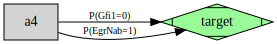

In [17]:
sp.as_graph()

In [18]:
sp.as_table()

,EgrNab,Gfi1
0,,0
1,1,
